<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.137922,51.698426,46.231620,25.156637,226.224604,217.535498,8.689106
1,0.0,1.0,45.040600,39.455140,32.466877,35.755726,162.718343,132.911192,29.807151
2,0.0,2.0,50.931248,74.644343,34.788719,20.780731,191.145041,179.104215,12.040825
3,0.0,3.0,78.591470,39.433116,40.958837,2.702059,171.685481,182.591462,-10.905981
4,0.0,4.0,58.583020,88.993074,87.170486,-5.498530,239.248051,218.627734,20.620317
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.361945,51.789841,38.507261,-24.050936,119.608112,131.668528,-12.060416
29996,999.0,26.0,20.244139,53.852392,30.975419,-21.995565,93.076384,96.386799,-3.310415
29997,999.0,27.0,96.942436,81.410037,71.961123,42.634230,302.947827,269.628108,33.319719
29998,999.0,28.0,29.521209,78.727639,71.518670,-72.644557,117.122961,180.908954,-63.785992


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.137922,51.698426,46.231620,25.156637,226.224604,217.535498,8.689106
1,0.0,1.0,45.040600,39.455140,32.466877,35.755726,162.718343,132.911192,29.807151
2,0.0,2.0,50.931248,74.644343,34.788719,20.780731,191.145041,179.104215,12.040825
3,0.0,3.0,78.591470,39.433116,40.958837,2.702059,171.685481,182.591462,-10.905981
4,0.0,4.0,58.583020,88.993074,87.170486,-5.498530,239.248051,218.627734,20.620317
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.361945,51.789841,38.507261,-24.050936,119.608112,131.668528,-12.060416
29996,999.0,26.0,20.244139,53.852392,30.975419,-21.995565,93.076384,96.386799,-3.310415
29997,999.0,27.0,96.942436,81.410037,71.961123,42.634230,302.947827,269.628108,33.319719
29998,999.0,28.0,29.521209,78.727639,71.518670,-72.644557,117.122961,180.908954,-63.785992


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    93.137922  51.698426  46.231620  ...  226.224604  217.535498   8.689106
      1.0    45.040600  39.455140  32.466877  ...  162.718343  132.911192  29.807151
      2.0    50.931248  74.644343  34.788719  ...  191.145041  179.104215  12.040825
      3.0    78.591470  39.433116  40.958837  ...  171.685481  182.591462 -10.905981
      4.0    58.583020  88.993074  87.170486  ...  239.248051  218.627734  20.620317
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   43.361945  51.789841  38.507261  ...  119.608112  131.668528 -12.060416
      26.0   20.244139  53.852392  30.975419  ...   93.076384   96.386799  -3.310415
      27.0   96.942436  81.410037  71.961123  ...  302.947827  269.628108  33.319719
      28.0   29.521209  78.727639  71.518670  ...  117.122961  180.908954 -63.785992
      29.0   59.771822  20.925267  44.191993  ...  153.945651  124.245710  29.699941

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    93.137922  51.698426  46.231620  ...  226.224604  217.535498   8.689106
      1.0    45.040600  39.455140  32.466877  ...  162.718343  132.911192  29.807151
      2.0    50.931248  74.644343  34.788719  ...  191.145041  179.104215  12.040825
      3.0    78.591470  39.433116  40.958837  ...  171.685481  182.591462 -10.905981
      4.0    58.583020  88.993074  87.170486  ...  239.248051  218.627734  20.620317
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   43.361945  51.789841  38.507261  ...  119.608112  131.668528 -12.060416
      26.0   20.244139  53.852392  30.975419  ...   93.076384   96.386799  -3.310415
      27.0   96.942436  81.410037  71.961123  ...  302.947827  269.628108  33.319719
      28.0   29.521209  78.727639  71.518670  ...  117.122961  180.908954 -63.785992
      29.0   59.771822  20.925267  44.191993  ...  153.945651  124.245710  29.699941

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.137922,51.698426,46.231620,25.156637,226.224604,217.535498,8.689106
1,0.0,1.0,45.040600,39.455140,32.466877,35.755726,162.718343,132.911192,29.807151
2,0.0,2.0,50.931248,74.644343,34.788719,20.780731,191.145041,179.104215,12.040825
3,0.0,3.0,78.591470,39.433116,40.958837,2.702059,171.685481,182.591462,-10.905981
4,0.0,4.0,58.583020,88.993074,87.170486,-5.498530,239.248051,218.627734,20.620317
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,43.361945,51.789841,38.507261,-24.050936,119.608112,131.668528,-12.060416
29996,999.0,26.0,20.244139,53.852392,30.975419,-21.995565,93.076384,96.386799,-3.310415
29997,999.0,27.0,96.942436,81.410037,71.961123,42.634230,302.947827,269.628108,33.319719
29998,999.0,28.0,29.521209,78.727639,71.518670,-72.644557,117.122961,180.908954,-63.785992


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    93.137922  51.698426  46.231620  ...  226.224604  217.535498   8.689106
      1.0    45.040600  39.455140  32.466877  ...  162.718343  132.911192  29.807151
      2.0    50.931248  74.644343  34.788719  ...  191.145041  179.104215  12.040825
      3.0    78.591470  39.433116  40.958837  ...  171.685481  182.591462 -10.905981
      4.0    58.583020  88.993074  87.170486  ...  239.248051  218.627734  20.620317
...                ...        ...        ...  ...         ...         ...        ...
999.0 25.0   43.361945  51.789841  38.507261  ...  119.608112  131.668528 -12.060416
      26.0   20.244139  53.852392  30.975419  ...   93.076384   96.386799  -3.310415
      27.0   96.942436  81.410037  71.961123  ...  302.947827  269.628108  33.319719
      28.0   29.521209  78.727639  71.518670  ...  117.122961  180.908954 -63.785992
      29.0   59.771822  20.925267  44.191993  ...  153.945651  124.245710  29.699941

[30000 rows x 7 columns]

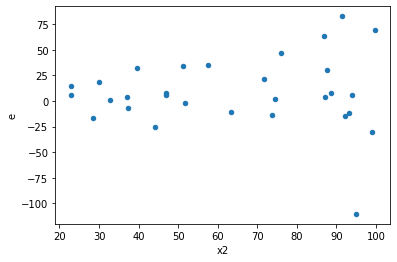

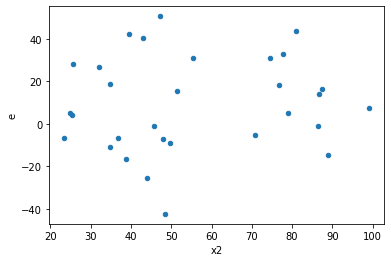

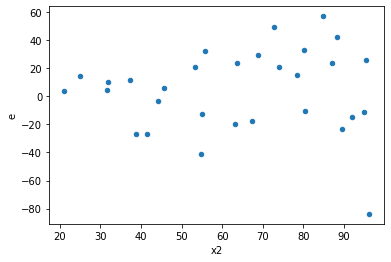

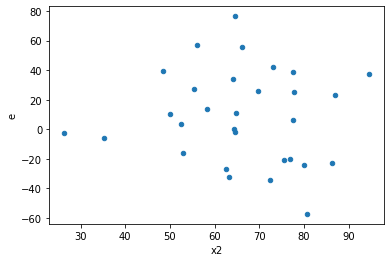

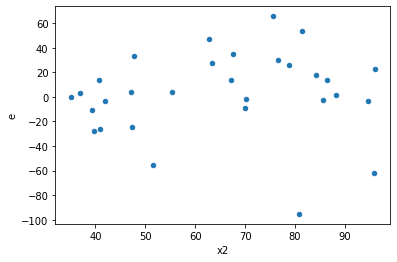

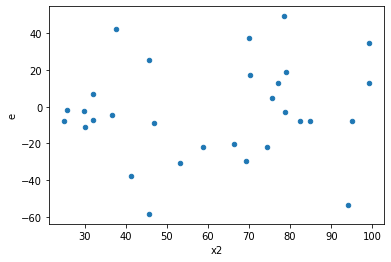

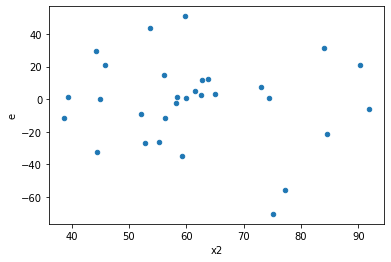

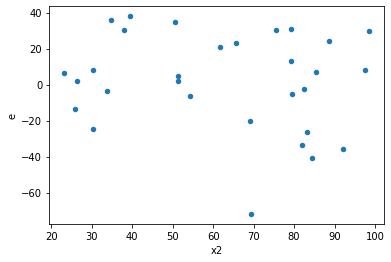

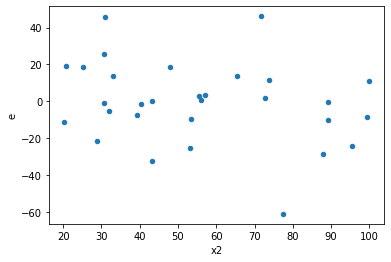

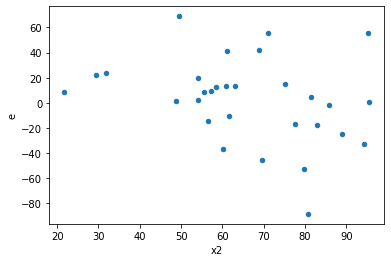

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,2607.242258558886,4715.096655282802,289.69358428432065,523.8996283647558,1.8084612735177903,0.3906731728770545,0.8046634135614728,0.19533658643852725,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,6078.163341357655,11490.948071594712,675.3514823730727,1276.772007954968,1.8905296594132048,0.3566779164182887,0.8216610417908556,0.17833895820914436,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,2563.791008469526,16220.516153830771,284.8656676077251,1802.2795726478635,6.32677004492411,0.011245831734137957,0.994377084132931,0.005622915867068978,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1548.8532716690465,5496.174417216589,172.0948079632274,610.6860463573988,3.5485442796617552,0.0730103124635959,0.963494843768202,0.03650515623179795,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,2667.816542173504,5355.437893319148,296.42406024150046,595.0486548132387,2.0074236022826386,0.31394590809060174,0.8430270459546991,0.15697295404530087,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,1241.9975860077896,11377.185869897015,137.99973177864328,1264.1317633218905,9.160392900977554,0.0029096573642408696,0.9985451713178796,0.0014548286821204348,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,3644.0517465610164,5614.156938180174,404.8946385067796,623.7952153533527,1.5406358988942448,0.5298660886165854,0.7350669556917073,0.2649330443082927,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,4280.416350218595,6724.5466353670945,475.601816690955,747.1718483741216,1.5710029317647292,0.5115945174981138,0.7442027412509431,0.2557972587490569,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,2332.1227136051407,6864.169079562032,259.12474595612673,762.6854532846702,2.9433138485885983,0.12352361568817827,0.9382381921559109,0.061761807844089134,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2607.242258558886,4715.096655282802,289.69358428432065,523.8996283647558,1.8084612735177903,0.3906731728770545,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,6078.163341357655,11490.948071594712,675.3514823730727,1276.772007954968,1.8905296594132048,0.3566779164182887,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,2563.791008469526,16220.516153830771,284.8656676077251,1802.2795726478635,6.32677004492411,0.011245831734137957,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1548.8532716690465,5496.174417216589,172.0948079632274,610.6860463573988,3.5485442796617552,0.0730103124635959,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,2667.816542173504,5355.437893319148,296.42406024150046,595.0486548132387,2.0074236022826386,0.31394590809060174,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,1241.9975860077896,11377.185869897015,137.99973177864328,1264.1317633218905,9.160392900977554,0.0029096573642408696,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,6072.879054664267,5636.072951868086,674.7643394071407,626.2303279853429,0.9280726490904356,0.913286293867797,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,3644.0517465610164,5614.156938180174,404.8946385067796,623.7952153533527,1.5406358988942448,0.5298660886165854,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,4280.416350218595,6724.5466353670945,475.601816690955,747.1718483741216,1.5710029317647292,0.5115945174981138,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      560
Reject005=0 : Heteroscedasticity    440
Name: Result_test, dtype: int64